In [ ]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')
# '/content/gdrive/MyDrive/Colab Notebooks/NLP/week6/SMSSpamCollection.txt'
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/week8/oil.csv')
# df = pd.read_csv("./airline_review_training_data.csv")
df.head()
df.shape


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(100, 1)

# Sentiment Analysis

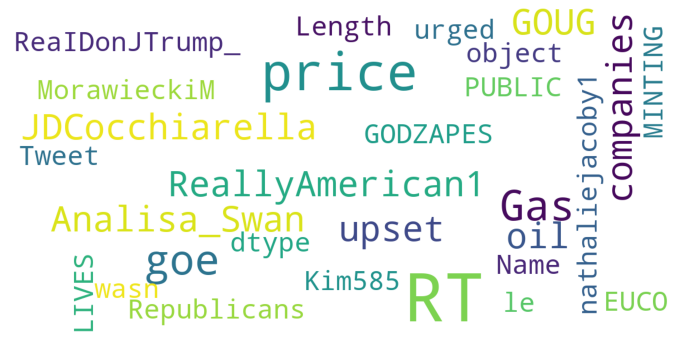

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=7000,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Tweet'])

In [ ]:
# Cleaning Training Data set

import re
df_clean = (
    # start with training data
    df
    # remove all the '\n' values with space
     .assign(clean_tweet= lambda x: [re.sub(r"&amp;","",text) for text in x.Tweet])
    #Remove “n\”
    .assign(clean_tweet= lambda x: [re.sub(r"\n","",text) for text in x.clean_tweet] )
    #Remove mentions i.e. any alphanumeric starting with “@”
    .assign(clean_tweet= lambda x: [re.sub("@[A-Za-z0-9_]+","",text) for text in x.clean_tweet])
    #Remove all hashtags i.e. “#”
    .assign(clean_tweet= lambda x: [re.sub("#[A-Za-z0-9_]+","",text) for text in x.clean_tweet])
#     
#     .assign(clean_document= lambda x: [re.sub(r"#","",text) for text in x.clean_document])
#    Remove all links i.e. any alphanumeric starting with https or http
    .assign(clean_tweet= lambda x: [re.sub(r"http\S+","",text) for text in x.clean_tweet])
    .assign(clean_tweet= lambda x: [re.sub(r"[^A-Za-z]+"," ",text) for text in x.clean_tweet])   
)

df_clean.head()

,Tweet,clean_tweet
0,RT @GODZAPES: PUBLIC MINTING GOES LIVES IN 30 ...,RT PUBLIC MINTING GOES LIVES IN MINUTES To kic...
1,RT @ReallyAmerican1: When the price of oil goe...,RT When the price of oil goes down yet your ga...
2,RT @Analisa_Swan: Gas companies are PRICE GOUG...,RT Gas companies are PRICE GOUGING A barrel of...
3,@ReaIDonJTrump_ So why wasn’t gas that price y...,So why wasn t gas that price your entire time...
4,RT @Kim585: @nathaliejacoby1 Just Republicans?...,RT Just Republicans I think everyone should bl...


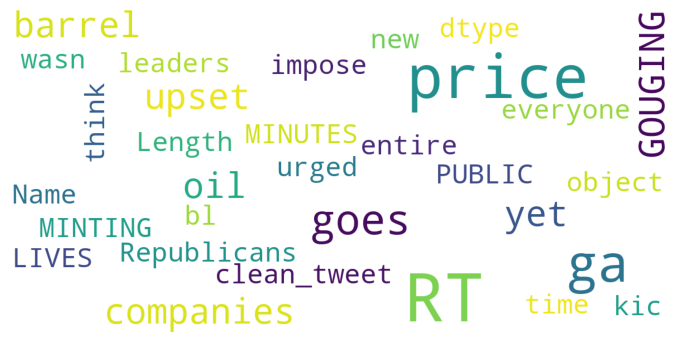

In [ ]:
show_wordcloud(df_clean['clean_tweet'])

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 70.0 MB/s 
     |████████████████████████████████| 6.5 MB 52.1 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
     |████████████████████████████████| 895 kB 48.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline


classifier = pipeline("sentiment-analysis")
df_clean = (
    df_clean
    #  classification using hugging face
    .assign(hugn_face = lambda x: x['clean_tweet'].apply(lambda s: classifier(s)[0]['label']))
# get the label and scroe from hugging face into different columns
    # .assign(
    #      hgn_label = lambda x: x['hugn_face'].apply(lambda s: (s[0]['label'])),
    #      hgn_score = lambda x: x['hugn_face'].apply(lambda s: (s[0]['score']))
    # )
    # if sentiment is negative mark as 0 other wise 1
    .assign(cln_hgn_sentiment = lambda x:x['hugn_face'].apply(lambda x:0 if x=='NEGATIVE'  else 1))
)

df_clean

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

,Tweet,clean_tweet,hugn_face,cln_hgn_sentiment
0,RT @GODZAPES: PUBLIC MINTING GOES LIVES IN 30 ...,RT PUBLIC MINTING GOES LIVES IN MINUTES To kic...,NEGATIVE,0
1,RT @ReallyAmerican1: When the price of oil goe...,RT When the price of oil goes down yet your ga...,NEGATIVE,0
2,RT @Analisa_Swan: Gas companies are PRICE GOUG...,RT Gas companies are PRICE GOUGING A barrel of...,NEGATIVE,0
3,@ReaIDonJTrump_ So why wasn’t gas that price y...,So why wasn t gas that price your entire time...,NEGATIVE,0
4,RT @Kim585: @nathaliejacoby1 Just Republicans?...,RT Just Republicans I think everyone should bl...,NEGATIVE,0
...,...,...,...,...
95,RT @JDCocchiarella: You should be more upset w...,RT You should be more upset with the price of ...,NEGATIVE,0
96,RT @Analisa_Swan: Gas companies are PRICE GOUG...,RT Gas companies are PRICE GOUGING A barrel of...,NEGATIVE,0
97,RT @JDCocchiarella: You should be more upset w...,RT You should be more upset with the price of ...,NEGATIVE,0
98,RT @ReallyAmerican1: When the price of oil goe...,RT When the price of oil goes down yet your ga...,NEGATIVE,0


In [ ]:
df_clean[2:3].values


array([['@XO_LM This is what most western countries do there’s a gas price increase I don’t see the problem',
        ' This is what most western countries do there s a gas price increase I don t see the problem',
        'POSITIVE', 1]], dtype=object)

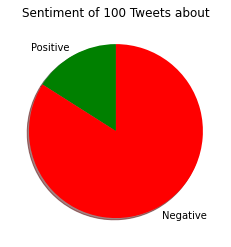

In [ ]:

from collections import Counter

counter = Counter(df_clean['cln_hgn_sentiment'])
positive = counter[1]
negative = counter[0]

labels = 'Positive', 'Negative'
sizes = [positive, negative]
colors = ['green', 'red', 'grey']
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 100 Tweets about")
plt.show()


# Summarization

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 3.2 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
     |████████████████████████████████| 596 kB 54.0 MB/s 
     |████████████████████████████████| 6.5 MB 46.3 MB/s 
     |████████████████████████████████| 895 kB 44.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
f = open('/content/gdrive/MyDrive/Colab Notebooks/NLP/week8/oldmanseatext.txt', "r", encoding="latin1")

Mounted at /content/gdrive


In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization")
to_tokenize = f.readlines()
summarized = summarizer(to_tokenize, min_length=75, max_length=300)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
Your max_length is set to 300, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 300, but you input_length is only 8. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 300, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 300, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 300, but you input_length is only 5. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 300, but you input_length is only 7. You might consider decreasing max_length manually, e.g. summa

KeyboardInterrupt: ignored

In [ ]:
print(summarized)

In [ ]:
article ='''Rosa Rivera-Ortiz is an up-and-coming lawyer in a San Diego firm. Held back by her ethnicity and her gender,
 she works twice as hard as her colleagues, and she’s as surprised as anyone when she’s requested specifically for a high-profile case. Bron Welty, an A-list actor and action star, has been arrested for the murder of his live-in housekeeper. The cop heading the case is older, ex-military, a veteran of more than one war, and an occasional sufferer of PTSD. Rosa’s hired to defend the movie star; and it seems like an easy
 win until she uncovers some secrets that not only make her believe her client is guilty, but may be one of the worst serial killers in the past two decades… and he knows she found out. '''
print(summarizer(article, max_length=50, min_length=30))


[{'summary_text': ' Rosa Rivera-Ortiz is an up-and-coming lawyer in a San Diego firm . Bron Welty, an A-list actor and action star, has been arrested for the murder of his live-in housekeeper .'}]


# Question answer


In [ ]:
qa_model = pipeline("question-answering")
context = '''A strike at Ontario's 24 public colleges has been averted after both sides reached a last-minute agreement on Thursday night to enter binding interest arbitration.
The college faculty branch of the Ontario Public Service Employees Union, which represents more than 16,000 professors, instructors, librarians and counsellors, had planned to walk out on Friday if their demands were not met.
The union was in talks on Thursday with the College Employer Council in an attempt to reach a negotiated settlement before the strike deadline. The CEC is a government-mandated bargaining unit that represents Ontario's 24 publicly-funded colleges.
Both parties tweeted on Thursday night that they had reached a deal and the strike, which was set to begin at 12:01 a.m. on Friday, is now called off. All work-to-rule strike activities are expected to stop as well.
The strike would have affected more than 210,000 students.
Key issues in the labour dispute were workload, the contracting out of faculty work, and benefits for part-time faculty, according to the union.
Earlier this week, Ontario Colleges and Universities Minister Jill Dunlop said: "Students cannot afford a strike at this time."
The union, in a letter to the colleges, had said that binding interest arbitration is a common way for labour disputes in the post-secondary sector to be resolved and would not be a win for the union or the colleges, but for students'''
ans = qa_model({'question': 'What was strike About. ',
           'context': f'{context}'})
print(ans)




No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


{'score': 0.0007177352672442794, 'start': 748, 'end': 758, 'answer': '12:01 a.m.'}


In [ ]:
ans2 = qa_model({'question': 'How many student were affected. ',
           'context': f'{context}'})
print(ans2)

{'score': 0.6383182406425476, 'start': 895, 'end': 902, 'answer': '210,000'}


In [ ]:
ans3 = qa_model({'question': 'How many college participated. ',
           'context': f'{context}'})
print(ans3)

{'score': 0.07460726797580719, 'start': 22, 'end': 24, 'answer': '24'}


# Text generation

In [ ]:
# using the same summary as the prompt text we almost get the similar story as we have given above
text_gen_pipeline = pipeline('text-generation', model='gpt2')
prompt = 'Rosa Rivera-Ortiz is an up-and-coming lawyer in a San Diego firm . Bron Welty, an A-list actor and action star, has been arrested for the murder of his live-in housekeeper'
text_gen_pipeline(prompt, max_length=200)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Rosa Rivera-Ortiz is an up-and-coming lawyer in a San Diego firm . Bron Welty, an A-list actor and action star, has been arrested for the murder of his live-in housekeeper and neighbor, Yvonne Smith. He\'s also charged in one count of felony murder. Wilfrid Sasso has been accused of being the killer\'s attorney.\n\nAfter Sasso had his son found murdered, a detective found two other people, both dead. The suspect had been "pushed off the property," said sheriff\'s spokeswoman Julie White. The search led to the discovery of a man had the name "Dilbert," according to police. Dilbert\'s wife, Barbara, has been charged in connection with the deaths.\n\nWilfrid Sasso and his wife Barbara are the two people, who could be suspects if the arrest of Wilfrid Sasso ends in a finding of guilt related to the killing of Yvon'}]

In [ ]:
# References
# https://www.thepythoncode.com/article/text-summarization-using-huggingface-transformers-python
# https://www.analyticsvidhya.com/blog/2021/10/text-summarization-using-the-conventional-hugging-face-transformer-and-cosine-similarity/
# https://www.cbc.ca/news/canada/toronto/no-strike-ontario-colleges-binding-interest-arbitration-1.6389278
# https://thewritepractice.com/short-story-ideas/

SyntaxError: ignored